In [2]:
%load_ext autoreload
%autoreload 2

import networkx as nx
import numpy as np
from docplex.mp.model import Model

from qiskit_optimization.applications.ising.vehicle_routing import VehicleRouting
from qiskit_optimization.algorithms import  CplexOptimizer, OptimizationResult



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


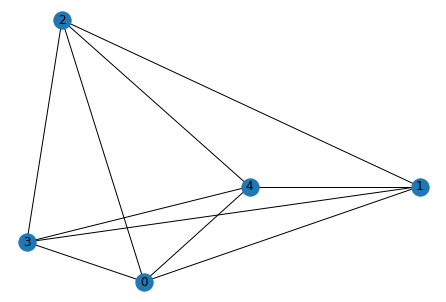

In [6]:
vr = VehicleRouting.create_random_instance(n=5, seed=600)
g = vr.graph
pos=[g.nodes[node]['pos']  for node in g.nodes]
nx.draw(g, with_labels=True, pos=[g.nodes[node]['pos']  for node in g.nodes])
depot=0
num_vehicle=2


In [10]:
qp = vr.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Vehicle Routing

Minimize
 obj: 49 x_0_1 + 36 x_0_2 + 21 x_0_3 + 22 x_0_4 + 49 x_1_0 + 65 x_1_2 + 67 x_1_3
      + 29 x_1_4 + 36 x_2_0 + 65 x_2_1 + 29 x_2_3 + 38 x_2_4 + 21 x_3_0
      + 67 x_3_1 + 29 x_3_2 + 39 x_3_4 + 22 x_4_0 + 29 x_4_1 + 38 x_4_2
      + 39 x_4_3
Subject To
 c0: x_1_0 + x_1_2 + x_1_3 + x_1_4 = 1
 c1: x_2_0 + x_2_1 + x_2_3 + x_2_4 = 1
 c2: x_3_0 + x_3_1 + x_3_2 + x_3_4 = 1
 c3: x_4_0 + x_4_1 + x_4_2 + x_4_3 = 1
 c4: x_0_1 + x_2_1 + x_3_1 + x_4_1 = 1
 c5: x_0_2 + x_1_2 + x_3_2 + x_4_2 = 1
 c6: x_0_3 + x_1_3 + x_2_3 + x_4_3 = 1
 c7: x_0_4 + x_1_4 + x_2_4 + x_3_4 = 1
 c8: x_1_0 + x_2_0 + x_3_0 + x_4_0 = 2
 c9: x_0_1 + x_0_2 + x_0_3 + x_0_4 = 2
 c10: x_1_2 + x_2_1 <= 1
 c11: x_1_3 + x_3_1 <= 1
 c12: x_1_4 + x_4_1 <= 1
 c13: x_2_3 + x_3_2 <= 1
 c14: x_2_4 + x_4_2 <= 1
 c15: x_3_4 + x_4_3 <= 1
 c16: x_1_2 + x_1_3 + x_2_1 + x_2_3 + x_3_1 + x_3_2 <= 2
 c17: x_1_2 + x_1_4 + x_2_1 + x_2_4 + x_4_1 +

In [16]:
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 186.0
optimal value: [ 1.  1. -0. -0. -0. -0. -0.  1. -0. -0.  1. -0.  1. -0. -0. -0.  1. -0.
 -0. -0.]
status: SUCCESS

In [17]:
vr.interpret(result)

[[[0, 1], [1, 4], [4, 0]], [[0, 2], [2, 3], [3, 0]]]

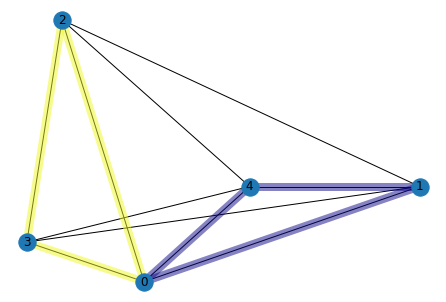

In [19]:
vr.draw_graph(result, pos)